In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing The Libraries

In [2]:
import os
import warnings
import tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub

from tensorflow.keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')

# importing arranging and creating the paths


In [3]:
data_dir = "/content/drive/MyDrive/Projects/waste_classification_for_recycling/Data"
print(data_dir)

/content/drive/MyDrive/Projects/waste_classification_for_recycling/Data


In [4]:
class_names = os.listdir(data_dir)
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash', 'organic']


# Creating the path for each classes

In [5]:
cardboard_path = os.path.join(data_dir, "cardboard")
glass_path = os.path.join(data_dir, "glass")
metal_path = os.path.join(data_dir, "metal")
paper_path = os.path.join(data_dir, "paper")
plastic_path = os.path.join(data_dir, "plastic")
trash_path = os.path.join(data_dir, "trash")
organic_path = os.path.join(data_dir, "organic")


print(cardboard_path)
print(glass_path)
print(metal_path)
print(paper_path)
print(plastic_path)
print(trash_path)
print(organic_path)

/content/drive/MyDrive/Projects/waste_classification_for_recycling/Data/cardboard
/content/drive/MyDrive/Projects/waste_classification_for_recycling/Data/glass
/content/drive/MyDrive/Projects/waste_classification_for_recycling/Data/metal
/content/drive/MyDrive/Projects/waste_classification_for_recycling/Data/paper
/content/drive/MyDrive/Projects/waste_classification_for_recycling/Data/plastic
/content/drive/MyDrive/Projects/waste_classification_for_recycling/Data/trash
/content/drive/MyDrive/Projects/waste_classification_for_recycling/Data/organic


# Knowing the Number of elements

In [6]:
total_classes = len(os.listdir(data_dir))

total_cardboard = len(os.listdir(cardboard_path))
total_glass = len(os.listdir(glass_path))
total_metal = len(os.listdir(metal_path))
total_paper = len(os.listdir(paper_path))
total_plastic = len(os.listdir(plastic_path))
total_trash = len(os.listdir(trash_path))
total_organic = len(os.listdir(organic_path))
Total_samples = total_cardboard + total_glass + total_metal + total_paper + total_plastic + total_trash + total_organic


print(f"Total classes: {total_classes}")
print("------------------")
print(f"Total cardboard: {total_cardboard}")
print(f"Total glass: {total_glass}")
print(f"Total metal: {total_metal}")
print(f"Total paper: {total_paper}")
print(f"Total plastic: {total_plastic}")
print(f"Total trash: {total_trash}")
print(f"Total organic: {total_organic}")
print("------------------")
print(f"Total samples: {Total_samples}")

Total classes: 7
------------------
Total cardboard: 403
Total glass: 501
Total metal: 410
Total paper: 594
Total plastic: 482
Total trash: 137
Total organic: 1000
------------------
Total samples: 3527


# Importing The dataset

In [7]:
BATCH_SIZE = 100
IMG_SIZE = 331

In [8]:
# When importing the dataset, we will split it into train and test from tf.keras.utils.image_dataset_from_directory
# We will set the validation_data and give it an imput shape

train_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                         seed = 123,
                                                         subset= "training",
                                                         validation_split= 0.2,
                                                         image_size= (IMG_SIZE, IMG_SIZE),
                                                         batch_size= BATCH_SIZE,
                                                         shuffle = True
)

Found 3527 files belonging to 7 classes.
Using 2822 files for training.


In [9]:
validation_data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                         seed = 123,
                                                         subset= "validation",
                                                         validation_split= 0.2,
                                                         image_size= (IMG_SIZE, IMG_SIZE),
                                                         batch_size= BATCH_SIZE
)

Found 3527 files belonging to 7 classes.
Using 705 files for validation.


# Lets plot some images and see

In [10]:
classes = train_data.class_names
print(classes)

['cardboard', 'glass', 'metal', 'organic', 'paper', 'plastic', 'trash']


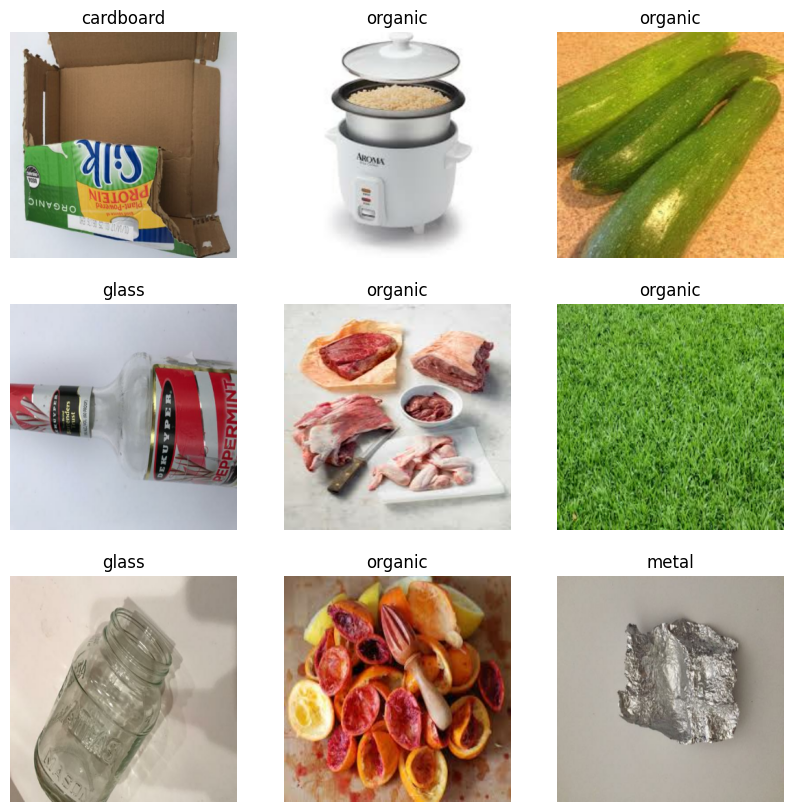

In [11]:
plt.figure(figsize = (10, 10))
for img, label in train_data.take(1):
  for i in range(9):
    fig = plt.subplot(3, 3, i + 1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(classes[label[i]])
    plt.axis("off")

plt.show()

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plotImages(image_arr, rows=5, cols=5, figsize=(10, 10)):
    """
    Display a grid of images in rows and columns.

    Parameters:
    - image_arr: List of images (NumPy arrays or image data).
    - rows: Number of rows in the grid (default is 5).
    - cols: Number of columns in the grid (default is 5).
    - figsize: Size of the figure (default is (10, 10)).
    """
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten()

    for i, img in enumerate(image_arr):
        ax = axes[i]
        ax.imshow(img)
        ax.axis('off')  # Turn off axis labels and ticks

    plt.tight_layout()
    plt.show()


# Resize and rescale and augmentation using image data generator

In [13]:
train_ds = ImageDataGenerator(rescale= 1./255,
                              vertical_flip = True,
                              horizontal_flip = True,
                              brightness_range=(0.2, 0.9),
                              shear_range=0.7,
                              zoom_range=0.6
                              )

aug_image = train_ds.flow_from_directory(directory = data_dir,
                                         target_size = (IMG_SIZE, IMG_SIZE),
                                         batch_size = BATCH_SIZE,
                                         class_mode = 'categorical',
                                         shuffle = True
)

Found 3527 images belonging to 7 classes.


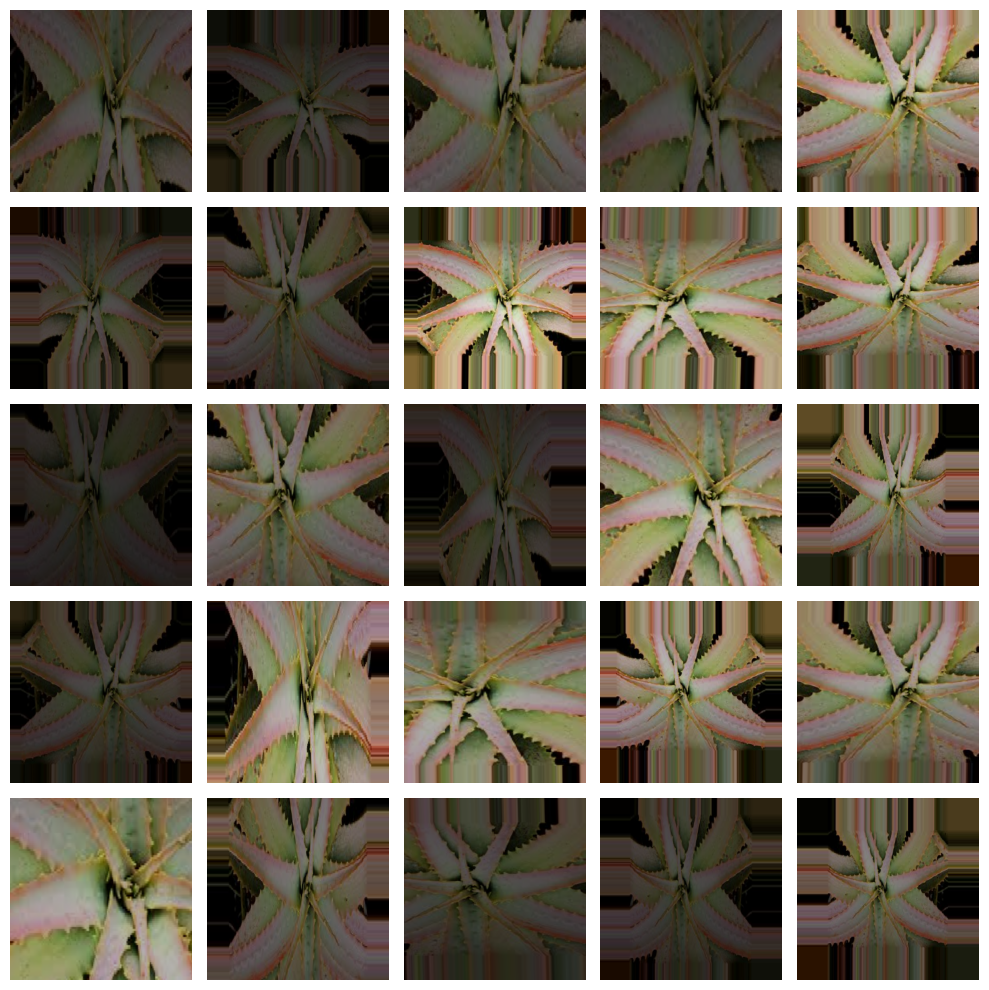

In [14]:
plotImages([aug_image[0][0][0] for i in range(25)])

# Rescaling amd Resizing

In [15]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE),
    tf.keras.layers.Rescaling(1./255)
])

# Data Augmentation

In [16]:
# from keras.src.layers.preprocessing.image_preprocessing import RandomZoom
augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomBrightness(factor = 0.2),
    tf.keras.layers.RandomZoom(0.6),
    tf.keras.layers.RandomFlip(mode = "horizontal_and_vertical")
])

# Training using my custom made model

In [17]:
model = tf.keras.Sequential([
    # Add the preprocessing layers created earlier.
    resize_and_rescale,
    augmentation,

    tf.keras.layers.Conv2D(32, (3, 3), activation= 'relu', padding = 'same', input_shape = (IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation= 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation= 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation= 'relu'),

    tf.keras.layers.Dense(7, activation = 'softmax')
])


In [18]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [19]:
history = model.fit(train_data,
                    epochs = 6,
                    validation_data = validation_data)

Epoch 1/6
29/29 [==============================] - 38s 572ms/step - loss: 10.0542 - accuracy: 0.2300 - val_loss: 1.9001 - val_accuracy: 0.2752
Epoch 2/6
29/29 [==============================] - 16s 480ms/step - loss: 1.8639 - accuracy: 0.2792 - val_loss: 1.7419 - val_accuracy: 0.2752
Epoch 3/6
29/29 [==============================] - 16s 493ms/step - loss: 1.8662 - accuracy: 0.2828 - val_loss: 1.8631 - val_accuracy: 0.2752
Epoch 4/6
29/29 [==============================] - 16s 486ms/step - loss: 1.8564 - accuracy: 0.2838 - val_loss: 1.6914 - val_accuracy: 0.2752
Epoch 5/6
29/29 [==============================] - 17s 494ms/step - loss: 1.8429 - accuracy: 0.2856 - val_loss: 1.6520 - val_accuracy: 0.2752
Epoch 6/6
29/29 [==============================] - 16s 462ms/step - loss: 2.1321 - accuracy: 0.2824 - val_loss: 1.8558 - val_accuracy: 0.2738


# Using Transfer Learning

In [20]:
feature_extractor = "https://tfhub.dev/google/imagenet/nasnet_large/classification/5"
feature_extractor_layer = hub.KerasLayer(feature_extractor, input_shape = (331, 331, 3))

In [21]:
feature_extractor_layer.trainable = False

In [22]:
model = tf.keras.Sequential([
    resize_and_rescale,
    feature_extractor_layer,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(7, activation = 'softmax')
])

model.build([None, 331, 331, 3])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 331, 331, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              88953851  
                                                                 
 dropout (Dropout)           (None, 1001)              0         
                                                                 
 dense_2 (Dense)             (None, 7)                 7014      
                                                                 
Total params: 88960865 (339.36 MB)
Trainable params: 7014 (27.40 KB)
Non-trainable params: 88953851 (339.33 MB)
_________________________________________________________________


In [23]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [24]:
history_ = model.fit(train_data,
                    epochs = 6,
                    validation_data = validation_data)

Epoch 1/6
29/29 [==============================] - 140s 4s/step - loss: 1.5147 - accuracy: 0.4972 - val_loss: 0.6420 - val_accuracy: 0.7972
Epoch 2/6
29/29 [==============================] - 104s 4s/step - loss: 0.6306 - accuracy: 0.8016 - val_loss: 0.5041 - val_accuracy: 0.8326
Epoch 3/6
29/29 [==============================] - 103s 3s/step - loss: 0.4990 - accuracy: 0.8427 - val_loss: 0.4526 - val_accuracy: 0.8553
Epoch 4/6
29/29 [==============================] - 105s 4s/step - loss: 0.4399 - accuracy: 0.8476 - val_loss: 0.4082 - val_accuracy: 0.8723
Epoch 5/6
29/29 [==============================] - 103s 4s/step - loss: 0.3908 - accuracy: 0.8753 - val_loss: 0.3934 - val_accuracy: 0.8794
Epoch 6/6
29/29 [==============================] - 103s 3s/step - loss: 0.3603 - accuracy: 0.8831 - val_loss: 0.3899 - val_accuracy: 0.8809


# Check Predictions

In [30]:
model.evaluate(validation_data)

8/8 [==============================] - 23s 3s/step - loss: 0.3899 - accuracy: 0.8809


[0.38990479707717896, 0.8808510899543762]

In [34]:
class_names = np.array(classes)
class_names

array(['cardboard', 'glass', 'metal', 'organic', 'paper', 'plastic',
       'trash'], dtype='<U9')

In [44]:
# predicted_batch = model.predict(validation_data)
# predicted_batch = tf.squeeze(predicted_batch).numpy()
# predicted_ids = np.argmax(predicted_batch, axis=-1)
# predicted_class_names = class_names[predicted_ids]
# predicted_class_names

In [45]:
# image_batch, label_batch = next(iter(train_data.take(1)))
# image_batch = image_batch.numpy()
# label_batch = label_batch.numpy()

In [46]:
# label_batch

In [47]:
# print("Labels: ", label_batch)
# print("Predicted labels: ", predicted_ids)

In [48]:
# plt.figure(figsize=(10,9))
# for n in range(30):
#   plt.subplot(6,5,n+1)
#   plt.subplots_adjust(hspace = 0.3)
#   plt.imshow(validation_data[n])
#   color = "blue" if predicted_ids[n] == label_batch[n] else "red"
#   plt.title(predicted_class_names[n].title(), color=color)
#   plt.axis('off')
# _ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")